In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
f_birth=pd.read_excel('D:/Day_total_female_birth.xlsx',index_col=[0],parse_dates=[0])

In [63]:
f_birth.head()

,births
date,
2015-01-01,8068
2015-01-02,10850
2015-01-03,8328
2015-01-04,7065
2015-01-05,11892


In [64]:
type(f_birth)

pandas.core.frame.DataFrame

In [65]:
series_value=f_birth.values

In [66]:
series_value

array([[ 8068],
       [10850],
       [ 8328],
       [ 7065],
       [11892],
       [12425],
       [12141],
       [12094],
       [11868],
       [ 8014],
       [ 7172],
       [11479],
       [11924],
       [12013],
       [12339],
       [11861],
       [ 8280],
       [ 7195],
       [10602],
       [12242],
       [12086],
       [11949],
       [11910],
       [ 8235],
       [ 7186],
       [11728],
       [11882],
       [11602],
       [11967],
       [11571],
       [ 7987],
       [ 7139],
       [11480],
       [12079],
       [11924],
       [11821],
       [11656],
       [ 8285],
       [ 7265],
       [11937],
       [12291],
       [11911],
       [12285],
       [11321],
       [ 8390],
       [ 7508],
       [11038],
       [11952],
       [12061],
       [11968],
       [11864],
       [ 8343],
       [ 7254],
       [11260],
       [11941],
       [11828],
       [11672],
       [11596],
       [ 7989],
       [ 7273],
       [11609],
       [12402],
       [

In [67]:
type(series_value)

numpy.ndarray

In [68]:
f_birth.size

365

In [69]:
f_birth.tail()

,births
date,
2015-12-27,7518
2015-12-28,13100
2015-12-29,13458
2015-12-30,13100
2015-12-31,11608


In [70]:
f_birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


In [72]:
f_birth=f_birth[0:365]

In [73]:
f_birth.describe()

,births
count,365.000000
mean,10899.991781
std,2076.683881
min,6515.000000
25%,8431.000000
50%,11883.000000
75%,12339.000000
max,13949.000000


<AxesSubplot:xlabel='date'>

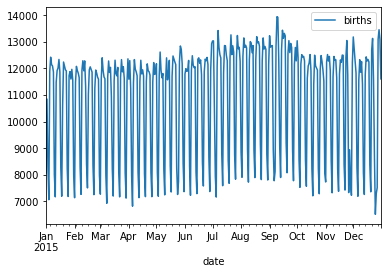

In [74]:
f_birth.plot()

In [78]:
f_birth_mean = f_birth.rolling(window = 20).mean()

<AxesSubplot:xlabel='date'>

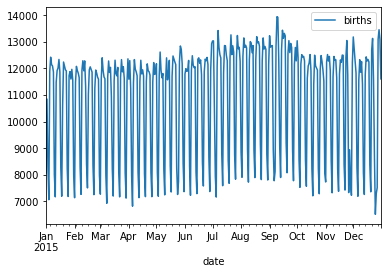

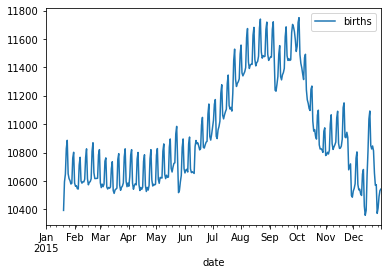

In [80]:
f_birth.plot()
f_birth_mean.plot()

In [83]:
value=pd.DataFrame(series_value)

In [84]:
birth_df= pd.concat([value,value.shift(1)],axis=1)

In [85]:
birth_df.head()

,0,0
0,8068,NaN
1,10850,8068.0
2,8328,10850.0
3,7065,8328.0
4,11892,7065.0


In [111]:
birth_df.columns= ['Actual_Birth','Forecast_Birth']

In [112]:
birth_df.tail()

,Actual_Birth,Forecast_Birth
360,7518,7294.0
361,13100,7518.0
362,13458,13100.0
363,13100,13458.0
364,11608,13100.0


In [113]:
birth_test= birth_test[0:364]

In [114]:
birth_test.head()

,Actual_Birth,Forecast_Birth
4,11892,7065.0
5,12425,11892.0
6,12141,12425.0
7,12094,12141.0
8,11868,12094.0


In [115]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [90]:
birth_test=birth_df[1:]

In [116]:
birth_test.tail()

,Actual_Birth,Forecast_Birth
360,7518,7294.0
361,13100,7518.0
362,13458,13100.0
363,13100,13458.0
364,11608,13100.0


In [117]:
birth_error= mean_squared_error(birth_test.Actual_Birth,birth_test.Forecast_Birth)

In [118]:
birth_error

5161827.493074792

In [119]:
np.sqrt(birth_error)

2271.9655571937687

In [120]:
#Auto Regressive Integrated Moving Average

In [122]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

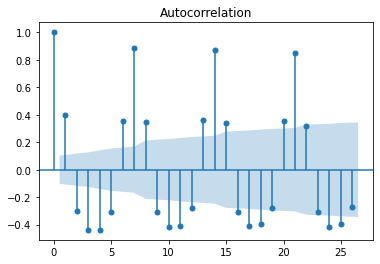

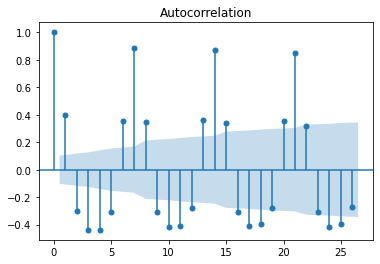

In [123]:
#plot_acf is to identify Parameter Q
#ARIMA (p,d,q)

plot_acf(f_birth)

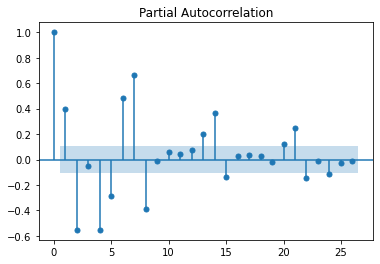

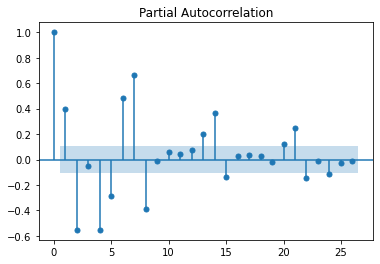

In [125]:
plot_pacf(f_birth)     #To identfy the value of P

In [126]:
# p=2,3  d=0, &q= 3,4
f_birth.size

365

In [127]:
birth_train= f_birth[0:330]
birth_test= f_birth[330:365]

In [128]:
birth_train.size

330

In [129]:
birth_test.size

35

In [136]:
from statsmodels.tsa.arima_model import ARIMA

In [139]:
birth_model= ARIMA(birth_train,order=(2,0,3))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will 

In [152]:
birth_model_fit= birth_model.fit()

In [153]:
birth_model_fit.aic

5629.975113315832

In [155]:
birth_forecast= birth_model_fit.forecast(steps=35)[0]

In [156]:
birth_forecast

array([ 9169.45402461, 12269.38850232, 11687.32066425, 10617.32683941,
        9863.8104727 ,  9935.38665105, 10708.7759519 , 11571.95011487,
       11902.62418944, 11512.10291973, 10741.58526346, 10172.84366728,
       10193.02429482, 10736.13511847, 11369.74347924, 11634.9086646 ,
       11375.18326117, 10821.45584944, 10393.64728836, 10385.23646624,
       10765.4441716 , 11229.56774863, 11439.88404043, 11268.93805521,
       10871.83345885, 10551.05835242, 10528.25158686, 10793.52608607,
       11132.80304207, 11298.0951386 , 11186.99839815, 10902.82170182,
       10663.01710851, 10634.38954513, 10818.80370137])

In [157]:
birth_test

,births
date,
2015-11-27,8942
2015-11-28,7734
2015-11-29,7230
2015-11-30,12214
2015-12-01,13185
2015-12-02,12708
2015-12-03,12281
2015-12-04,11828
2015-12-05,8262


In [158]:
np.sqrt(mean_squared_error(birth_test,birth_forecast))

2718.54243660978